# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))



In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [6]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token
tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID,['transactions', 'income', 'assets'])

# Print the public token
print(tkn_response)

# Are these public/access token guidelines outlined in the Plaid API documentation on their website?

{'public_token': 'public-sandbox-a617af3d-bb17-4746-9795-76fa075c7b86', 'request_id': '7sPeQCW159nvs0W'}


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(tkn_response['public_token'])


# Print the access token
print(exchange_response['access_token'])

access-sandbox-5fa93784-e44e-47c0-9981-1e9a8272960b


In [9]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [11]:
# Retrieve accounts

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
# Set time delta to '-90' instead of '-365' to indicate the last 90 days.

end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 

transaction_response = client.Transactions.get(access_token, start_date, end_date)

# Print accounts
#print(json.dumps(transaction_response['transactions'][1], indent=4, sort_keys=True))
#print(transaction_response.values())
key_list = [key for key in transaction_response]
print(key_list)

print(pretty_print_response(transaction_response))
#type(transaction_response)

['accounts', 'item', 'request_id', 'total_transactions', 'transactions']
{
    "accounts": [
        {
            "account_id": "G4DnDWbZm6t6MRreJkqWhML68o5PZxf1e5XdB",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "7nDRD4vqeNcQA6x8LNwyCwLK9JmWjEHg9oKqQ",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
         

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [12]:
# Set the start and end date 90 days from today

# Retrieve the transactions for the last 90 days
transactions = json.dumps(transaction_response['transactions'], indent=4, sort_keys=True)

# Print the transactions
print(type(transactions))
print(transactions)

<class 'str'>
[
    {
        "account_id": "G4DnDWbZm6t6MRreJkqWhML68o5PZxf1e5XdB",
        "account_owner": null,
        "amount": 6.33,
        "authorized_date": null,
        "category": [
            "Travel",
            "Taxi"
        ],
        "category_id": "22016000",
        "date": "2020-07-27",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Uber",
        "name": "Uber 072515 SF**POOL**",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": n

### 2. Print the categories for each transaction

In [13]:
# Create a for-loop to print the categories for each transaction
#categories = [category for category in transactions]
transactions_json = json.loads(transactions)
print(type(transactions_json))
attributes = [attribute for attribute in transactions_json[0]]
attributes
#transactions_json[0].values()

<class 'list'>


['account_id',
 'account_owner',
 'amount',
 'authorized_date',
 'category',
 'category_id',
 'date',
 'iso_currency_code',
 'location',
 'merchant_name',
 'name',
 'payment_channel',
 'payment_meta',
 'pending',
 'pending_transaction_id',
 'transaction_code',
 'transaction_id',
 'transaction_type',
 'unofficial_currency_code']

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [14]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
transactions_df = pd.DataFrame()

# Retrieve all the transactions

# Extract column data
dates = [transaction['date'] for transaction in transactions_json]
names = [transaction['name'] for transaction in transactions_json]
amounts = [transaction['amount'] for transaction in transactions_json]
categories =[transaction['category'][0] for transaction in transactions_json]
# The categories were in list form, with some transactions having multiple categories.  I used the first category
# in the list--the broadest category--for the categories pandas series.  Therefore, I used transaction['category'][0]
# indicating the first category in the list.

print(categories)
len(categories)


#print(type(transactions_json[8]['category']))

# Populate the transactions DataFrame with the transactions data

    # Create series to be added to dataframe
date = pd.Series(dates)
name = pd.Series(names)
amount = pd.Series(amounts)
category = pd.Series(categories)

type(date)

transactions_df['Date'] = date
transactions_df['Name'] = name
transactions_df['Amount'] = amount
transactions_df['Category'] = category

# Display sample data from the DataFrame    
transactions_df.head()

['Travel', 'Food and Drink', 'Payment', 'Food and Drink', 'Shops', 'Payment', 'Travel', 'Transfer', 'Transfer', 'Recreation', 'Travel', 'Food and Drink', 'Food and Drink', 'Food and Drink', 'Transfer', 'Travel', 'Travel', 'Food and Drink', 'Payment', 'Food and Drink', 'Shops', 'Payment', 'Travel', 'Transfer', 'Transfer', 'Recreation', 'Travel', 'Food and Drink', 'Food and Drink', 'Food and Drink', 'Transfer', 'Travel', 'Travel', 'Food and Drink', 'Payment', 'Food and Drink', 'Shops', 'Payment', 'Travel', 'Transfer', 'Transfer', 'Recreation', 'Travel', 'Food and Drink', 'Food and Drink', 'Food and Drink', 'Transfer', 'Travel']


,Date,Name,Amount,Category
0,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
1,2020-07-24,Tectra Inc,500.00,Food and Drink
2,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2020-07-23,KFC,500.00,Food and Drink
4,2020-07-23,Madison Bicycle Shop,500.00,Shops


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [15]:
# Display data types
transactions_df.dtypes

Date         object
Name         object
Amount      float64
Category     object
dtype: object

In [20]:
# Make any required data type transformation

# Date: object to datetime
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])

# Name: object to string (necessary?)
transactions_df['Name'].astype(str)

# Category: object to string (necessary?)
transactions_df['Category'].astype(str)

transactions_df.dtypes

Date        datetime64[ns]
Name                object
Amount             float64
Category            object
dtype: object

In [25]:
# Set the date column as index
transactions_df.set_index('Date', inplace=True)
#transactions_df.reset_index(drop=True, inplace=True)

transactions_df.sort_index(inplace=True)

# Display sample data
transactions_df.head()


# DON'T TOUCH THIS CELL#


,Name,Amount,Category
Date,,,
2020-04-30,United Airlines,500.00,Travel
2020-05-10,INTRST PYMNT,-4.22,Transfer
2020-05-11,SparkFun,89.40,Food and Drink
2020-05-12,Starbucks,4.33,Food and Drink
2020-05-12,McDonald's,12.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [16]:
# Fetch the income data
income_response = client.Income.get(access_token)


# Print the income data
print(income_response)

{'income': {'income_streams': [{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}, 'request_id': '9XtZMD9TOJayB5B'}


In [17]:
# Determine the previous year's gross income and print the results

    #List information types presented
info = [attribute for attribute in income_response['income']]
print(info)

gross_income = income_response['income']['last_year_income_before_tax']
print(gross_income)

['income_streams', 'last_year_income', 'last_year_income_before_tax', 'max_number_of_overlapping_income_streams', 'number_of_income_streams', 'projected_yearly_income', 'projected_yearly_income_before_tax']
7285


In [18]:
# Determine the current monthly income and print the results
current_monthly_income = income_response['income']['income_streams'][0]['monthly_income']
print(current_monthly_income)

500


In [19]:
# Determine the projected yearly income and print the results
projected_yearly_income = income_response['income']['projected_yearly_income']
print(projected_yearly_income)

6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [21]:
# Compute the total expenses per category
by_category = transactions_df.groupby('Category').sum()


# Display the expenses per category
by_category

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


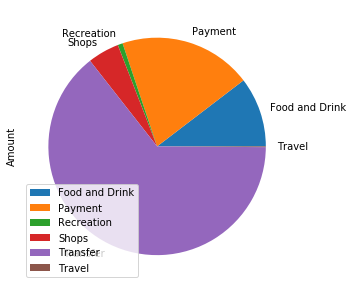

In [22]:
# Create a spending categories pie chart.
pie_chart = by_category.plot.pie(y='Amount', figsize=(5, 5))

### Calculate the expenses per month

In [26]:
# Create a DataFrame with the total expenses
#expenses_per_month = transactions_df.groupby(['Date'].dt.strftime('%B'))['Amount'].sum()

expenses_per_month = transactions_df.groupby(transactions_df.index.month).sum()


#transactions_df.index.month

# Display sample data
print(expenses_per_month)

    # Check total
transactions_df['Amount'].sum()

        Amount
Date          
4       500.00
5     10645.24
6     10645.24
7     10145.24


31935.72

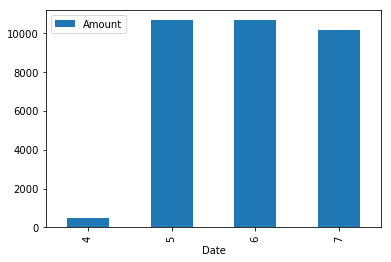

In [27]:
# Create a spending per month bar chart
expenses_per_month.plot(kind='bar')